<a href="https://colab.research.google.com/github/salman1r/car-damage-severity-classifire/blob/main/Classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

### Mounting Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import important package

In [61]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob


In [5]:
!nvidia-smi

Tue Sep  7 14:45:45 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    74W / 149W |    121MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

###Load data 

In [74]:
IMAGE_SIZE = [224, 224]   # resize all the image into 224X224

train_path = '/content/drive/MyDrive/data3a/data3a/training'
valid_path = '/content/drive/MyDrive/data3a/data3a/validation'
cls = glob('/content/drive/MyDrive/data3a/data3a/training/*')  #  define number of classes in our dataset

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 999 images belonging to 3 classes.


In [9]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 171 images belonging to 3 classes.


### Inception V3 model

In [10]:
# Import the InceptionV3 library
inc_v3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [11]:
# Set false for not further training the existing weights
for layer in inc_v3.layers:
    layer.trainable = False


In [12]:
x_inc= Flatten()(inc_v3.output)

In [13]:
# add last layer according to our class(we have three classes)
last_layer_inc = Dense(len(cls), activation='softmax')(x_inc)

In [14]:
#create the model
model_inc = Model(inputs=inc_v3.input, outputs=last_layer_inc)

In [15]:
#  model_inc.summary()

In [16]:
# compile the model with adam optimizer and categorical crossentropy loss 
model_inc.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
r_inc= model_inc.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
32/32 [==============================] - 95s 3s/step - loss: 6.8051 - accuracy: 0.4685 - val_loss: 3.5143 - val_accuracy: 0.5906
Epoch 2/15
32/32 [==============================] - 15s 469ms/step - loss: 2.2725 - accuracy: 0.6356 - val_loss: 2.3479 - val_accuracy: 0.6374
Epoch 3/15
32/32 [==============================] - 15s 472ms/step - loss: 1.4940 - accuracy: 0.7007 - val_loss: 1.7937 - val_accuracy: 0.6257
Epoch 4/15
32/32 [==============================] - 15s 471ms/step - loss: 0.8094 - accuracy: 0.7948 - val_loss: 1.5391 - val_accuracy: 0.6608
Epoch 5/15
32/32 [==============================] - 15s 467ms/step - loss: 0.9706 - accuracy: 0.7688 - val_loss: 3.0531 - val_accuracy: 0.5439
Epoch 6/15
32/32 [==============================] - 15s 466ms/step - loss: 1.6680 - accuracy: 0.7277 - val_loss: 2.3346 - val_accuracy: 0.6257
Epoch 7/15
32/32 [==============================] - 15s 465ms/step - loss: 0.8067 - accuracy: 0.8238 - val_loss: 2.1410 - val_accuracy: 0.6023
Ep

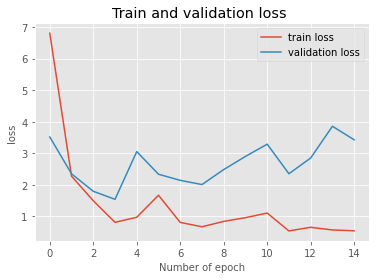

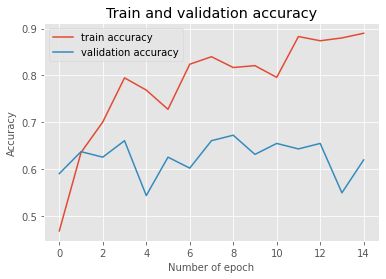

In [83]:
plt.plot(r_inc.history['loss'], label='train loss')
plt.plot(r_inc.history['val_loss'], label='validation loss')
plt.legend()
plt.title('Train and validation loss ')
plt.xlabel('Number of epoch', fontsize=10)
plt.ylabel('loss', fontsize=10)
plt.show()

plt.plot(r_inc.history['accuracy'], label='train accuracy')
plt.plot(r_inc.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.title('Train and validation accuracy')
plt.xlabel('Number of epoch', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.show()


### Residual Network model

In [19]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [20]:
for layer in resnet.layers:
    layer.trainable = False

In [21]:
x_res = Flatten()(resnet.output)

In [22]:
last_layer_res = Dense(len(cls), activation='softmax')(x_res)

In [23]:
model_res = Model(inputs=resnet.input, outputs=last_layer_res)

In [24]:
model_res.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [25]:
r_res = model_res.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
32/32 [==============================] - 22s 559ms/step - loss: 4.1878 - accuracy: 0.4224 - val_loss: 1.4506 - val_accuracy: 0.4327
Epoch 2/15
32/32 [==============================] - 16s 501ms/step - loss: 1.2798 - accuracy: 0.4975 - val_loss: 0.9964 - val_accuracy: 0.5497
Epoch 3/15
32/32 [==============================] - 16s 508ms/step - loss: 1.0328 - accuracy: 0.5255 - val_loss: 1.4492 - val_accuracy: 0.5439
Epoch 4/15
32/32 [==============================] - 16s 501ms/step - loss: 1.0533 - accuracy: 0.5295 - val_loss: 1.0268 - val_accuracy: 0.5497
Epoch 5/15
32/32 [==============================] - 16s 509ms/step - loss: 0.9742 - accuracy: 0.5706 - val_loss: 1.5523 - val_accuracy: 0.3801
Epoch 6/15
32/32 [==============================] - 16s 507ms/step - loss: 1.1540 - accuracy: 0.5025 - val_loss: 1.0536 - val_accuracy: 0.5029
Epoch 7/15
32/32 [==============================] - 16s 509ms/step - loss: 0.9493 - accuracy: 0.5756 - val_loss: 1.1144 - val_accuracy: 0.5439

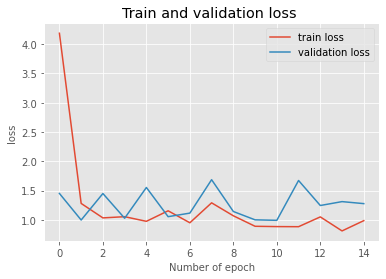

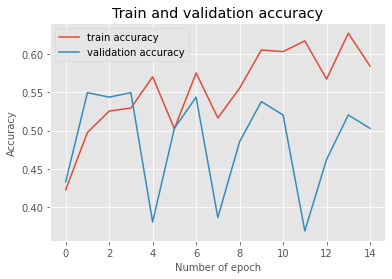

In [84]:
plt.plot(r_res.history['loss'], label='train loss')
plt.plot(r_res.history['val_loss'], label='validation loss')
plt.legend()
plt.title('Train and validation loss ')
plt.xlabel('Number of epoch', fontsize=10)
plt.ylabel('loss', fontsize=10)
plt.show()

plt.plot(r_res.history['accuracy'], label='train accuracy')
plt.plot(r_res.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.title('Train and validation accuracy')
plt.xlabel('Number of epoch', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.show()


### VGG16 model

In [31]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [32]:
for layer in resnet.layers:
    layer.trainable = False

In [33]:
x_vgg= Flatten()(vgg16.output)

In [34]:
last_layer_vgg= Dense(len(cls), activation='softmax')(x_vgg)

In [35]:
model_vgg = Model(inputs=vgg16.input, outputs=last_layer_vgg)

In [92]:
#  model_vgg.summary()

In [37]:
model_vgg.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [38]:
r_vgg = model_vgg.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
32/32 [==============================] - 52s 1s/step - loss: 2.5465 - accuracy: 0.3624 - val_loss: 1.0845 - val_accuracy: 0.4035
Epoch 2/15
32/32 [==============================] - 27s 842ms/step - loss: 1.0940 - accuracy: 0.3914 - val_loss: 1.0764 - val_accuracy: 0.3977
Epoch 3/15
32/32 [==============================] - 27s 843ms/step - loss: 1.1027 - accuracy: 0.3694 - val_loss: 1.0817 - val_accuracy: 0.4035
Epoch 4/15
32/32 [==============================] - 27s 846ms/step - loss: 1.0854 - accuracy: 0.3794 - val_loss: 1.0991 - val_accuracy: 0.3333
Epoch 5/15
32/32 [==============================] - 27s 847ms/step - loss: 1.0976 - accuracy: 0.3754 - val_loss: 1.0981 - val_accuracy: 0.3333
Epoch 6/15
32/32 [==============================] - 27s 842ms/step - loss: 1.0977 - accuracy: 0.3764 - val_loss: 1.0965 - val_accuracy: 0.3977
Epoch 7/15
32/32 [==============================] - 27s 826ms/step - loss: 1.0972 - accuracy: 0.3864 - val_loss: 1.0955 - val_accuracy: 0.3977
Ep

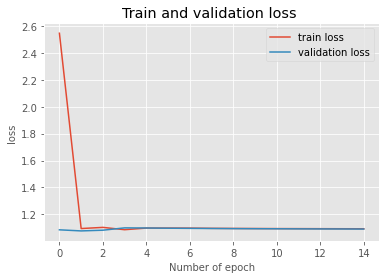

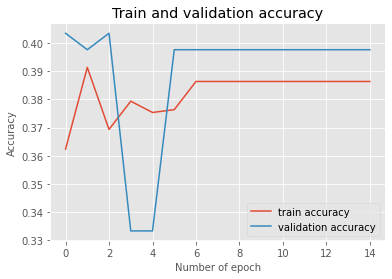

In [85]:
plt.plot(r_vgg.history['loss'], label='train loss')
plt.plot(r_vgg.history['val_loss'], label='validation loss')
plt.legend()
plt.title('Train and validation loss ')
plt.xlabel('Number of epoch', fontsize=10)
plt.ylabel('loss', fontsize=10)
plt.show()

plt.plot(r_vgg.history['accuracy'], label='train accuracy')
plt.plot(r_vgg.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.title('Train and validation accuracy')
plt.xlabel('Number of epoch', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.show()


### Analysis for selction the best model

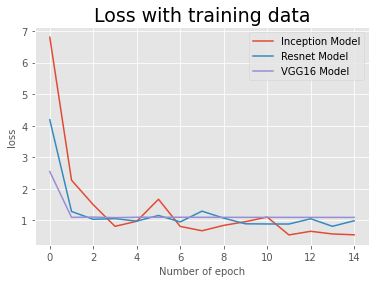

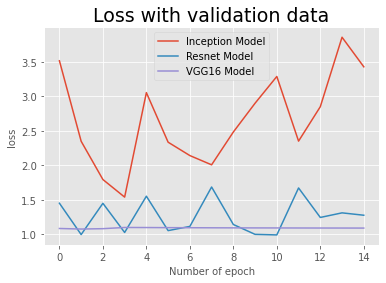

In [89]:
plt.plot(r_inc.history['loss'], label='Inception Model')
plt.plot(r_res.history['loss'], label='Resnet Model')
plt.plot(r_vgg.history['loss'], label='VGG16 Model')
plt.legend()
plt.title('Loss with training data', fontsize=19)
plt.xlabel('Number of epoch', fontsize=10)
plt.ylabel('loss', fontsize=10)
plt.show()

#plt.plot(r_vgg.history['loss'], label='train loss')
plt.plot(r_inc.history['val_loss'], label='Inception Model')
plt.plot(r_res.history['val_loss'], label='Resnet Model')
plt.plot(r_vgg.history['val_loss'], label='VGG16 Model')
plt.legend()
plt.title('Loss with validation data',fontsize=19)
plt.xlabel('Number of epoch', fontsize=10)
plt.ylabel('loss', fontsize=10)
plt.show()

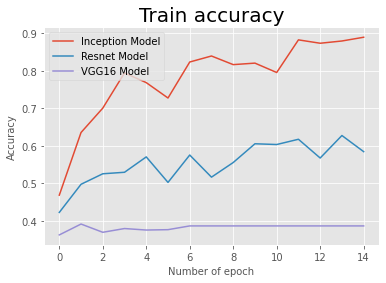

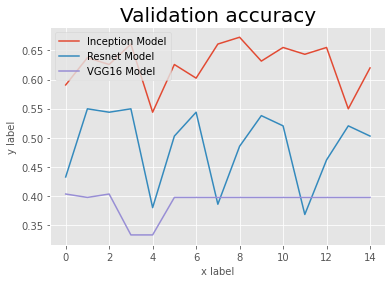

In [90]:
plt.plot(r_inc.history['accuracy'], label='Inception Model')
plt.plot(r_res.history['accuracy'], label='Resnet Model')
plt.plot(r_vgg.history['accuracy'], label='VGG16 Model')
plt.legend()
plt.title('Train accuracy' ,fontsize=20)
plt.xlabel('Number of epoch', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.show()


plt.plot(r_inc.history['val_accuracy'], label='Inception Model')
plt.plot(r_res.history['val_accuracy'], label='Resnet Model')
plt.plot(r_vgg.history['val_accuracy'], label='VGG16 Model')
plt.legend()
plt.title('Validation accuracy', fontsize=20)
plt.xlabel('x label', fontsize=10)
plt.ylabel('y label', fontsize=10)
plt.show()

In [91]:
## s

#### As we can see in the above plot, the inception model looks good model because it gives the highest accuracy and the lowest training loss among all the models. However, still, it has the highest validation loss after training with 15 epochs. 

In [93]:
model_inc.save('model_inception.h5')

## <b>Prediction with inception model</b>

In [94]:
y_pred = model_inc.predict(test_set)

In [95]:
y_pred

array([[6.65614337e-08, 9.99146223e-01, 8.53666454e-04],
       [8.71407688e-01, 1.28592342e-01, 4.97115726e-09],
       [3.72717318e-06, 9.99983072e-01, 1.32775158e-05],
       [2.10121107e-06, 9.76113588e-05, 9.99900222e-01],
       [2.30665140e-10, 9.99999881e-01, 1.12324152e-07],
       [4.83779259e-05, 9.99951601e-01, 3.06061274e-08],
       [8.52496232e-05, 3.39469552e-04, 9.99575317e-01],
       [2.55581969e-03, 9.97423649e-01, 2.05483630e-05],
       [2.08723661e-09, 1.00000000e+00, 1.24700971e-16],
       [8.82588211e-06, 1.03672147e-02, 9.89623964e-01],
       [3.51278613e-05, 8.32831029e-06, 9.99956489e-01],
       [1.04196333e-04, 9.99895811e-01, 2.74392887e-11],
       [9.99908328e-01, 9.16417339e-05, 1.75871240e-09],
       [8.56575649e-03, 9.90051806e-01, 1.38237188e-03],
       [1.81100622e-01, 8.18883657e-01, 1.57638060e-05],
       [2.27579621e-05, 9.99977231e-01, 3.28232892e-11],
       [5.53776729e-12, 2.08256971e-02, 9.79174316e-01],
       [9.99993563e-01, 6.46770

#**Conclusion**

### I created three different classifier models using a pre-trained deep learning model(Inception model, residual network model, and VGG16 model) that classify the cars on damage severity and determine their accuracy and loss. By comparing all accuracy and loss, I found that the inception model is the best classifier with validation accuracy above 60%. But inception model has some demerit that shows high variance (high difference between training error and validation error). Yet, it is the best model out of all models.